## Ejercicio 2 -Pandas
## Maestría Inteligencia de Negocios
## Seminario de Programación
## Julieth Perea


##  Introducción 

La revisión del comportamiento de los clientes en cualquier empresa es de vital importancia para el desarrollo de estrategias  tanto de mejoramiento de productos como de publicidad y toma de decisiones. Evaluaremos la información obtenida de un conjunto de registro obtenidos de una empresa de telecomunicaciones que cuenta con la revisión de las siguientes variables:

1. totrev: Ingresos del cliente
2. totmou: Total de minutos usados por el cliente
3. area: Área geográfica
4. creditcd: Indicador de tarjeta de crédito
5. eqpdays: Número de días (antigüedad) del equipo actual

Es importante mencionar que la empresa contiene una gran cantidad de clientes y hacer el análisis uno a uno no es lo  óptimo. Con ayuda de la programación y el análisis de datos, se logrará llegar a conclusiones rápidas y acertadas para encontrar relaciones que a simple vista no son tenidas en cuenta.


### Objetivos

En este caso usted tendrá que cargar varias bases de datos, hará una exploración básica sobre la información y fusionará las distintas bases para tener una visión general del problema. La idea es que desarrolle las siguientes habilidades:

1. Manejo de la librería pandas de Python para cargar y leer datos; 
2. Ideas elementales para una útil transformación de los datos;
3. Construcción y presentación de argumentos válidos que le brindarán una solución para la pregunta expresada más arriba y llegar a una conclusión. 
4. Visualización de gráficas elementales que le permitirá entender mejor la información contenida en los datos.



Para importar las librerías usamos el comando 


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [231]:
df=pd.read_csv("Bases/Credito_dias.csv", sep=",",index_col="Customer_ID")
df

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371
1069232,13552.0,1172.25,N,83
1031705,4152.0,577.39,Y,675
1089806,1863.0,294.26,Y,218
1076695,4155.0,433.16,N,222
...,...,...,...,...
1027614,2570.0,484.31,Y,611
1098422,2105.0,583.36,Y,1243
1096497,3690.0,294.29,Y,212


El conjunto de datos se encuentra en el `DataFrame` `df`

sobre el objeto creado podemos usar  algunas funciones  para darnos una idea del comportamiento de la información:
```python
df.head(n)  # imprime los primeros n registros del DataFrame
df.tail(n)  # imprime los últimos n registros del DataFrame 
df.shape    # imprime el numero de columnas y filas del DataFrame
df.columns  # imprime el nombre de las columnas del DataFrame
df.index    # imprime el indice de los registros del DataFrame
df.dtypes   # imprime el tipo de cada una de las columnnas del DataFrame
df.sample(n)# imprime una muestra aleatoria de n registros en el DataFrame
```

In [232]:
display("primeros 3 registros",df.head(3))
display("3 últimos registros",df.tail(3))
display("Columnas:",df.columns)
display("Índices:",df.index)
display("Tipos de registros en el DataFrame",df.dtypes)
display("Muestra aleatoria de 3 registros",df.sample(3))
display("dimensión",df.shape)

'primeros 3 registros'

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371
1069232,13552.0,1172.25,N,83
1031705,4152.0,577.39,Y,675


'3 últimos registros'

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1096497,3690.0,294.29,Y,212
1087248,3333.0,233.08,Y,290
1099003,5025.0,1436.49,Y,1029


'Columnas:'

Index(['totmou', 'totrev', 'creditcd', 'eqpdays'], dtype='object')

'Índices:'

Int64Index([1082423, 1069232, 1031705, 1089806, 1076695, 1091652, 1043846,
            1088967, 1045239, 1046584,
            ...
            1087145, 1002540, 1044082, 1083458, 1093976, 1027614, 1098422,
            1096497, 1087248, 1099003],
           dtype='int64', name='Customer_ID', length=10000)

'Tipos de registros en el DataFrame'

totmou      float64
totrev      float64
creditcd     object
eqpdays       int64
dtype: object

'Muestra aleatoria de 3 registros'

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1019237,1157.0,763.73,Y,418
1022340,1691.0,807.62,N,649
1084492,4341.0,253.17,Y,197


'dimensión'

(10000, 4)

In [233]:
df.isnull().any(axis=0)

totmou      False
totrev      False
creditcd     True
eqpdays     False
dtype: bool

In [234]:
perd=df.isnull().any(axis=1)

In [235]:
df[perd]

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1072218,5684.0,857.65,NaN,244
1066597,925.0,373.12,NaN,344
1023352,14466.0,2243.76,NaN,387
1045521,2504.0,756.79,NaN,495
1001813,76260.0,5526.11,NaN,361
...,...,...,...,...
1050795,15591.0,1330.71,NaN,447
1096985,3011.0,522.14,NaN,74
1025203,853.0,650.34,NaN,780


In [236]:
perdidos = df[df.isnull().any(axis=1)]
perdidos

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1072218,5684.0,857.65,NaN,244
1066597,925.0,373.12,NaN,344
1023352,14466.0,2243.76,NaN,387
1045521,2504.0,756.79,NaN,495
1001813,76260.0,5526.11,NaN,361
...,...,...,...,...
1050795,15591.0,1330.71,NaN,447
1096985,3011.0,522.14,NaN,74
1025203,853.0,650.34,NaN,780


In [237]:
df['totrev']

Customer_ID
1082423     906.58
1069232    1172.25
1031705     577.39
1089806     294.26
1076695     433.16
            ...   
1027614     484.31
1098422     583.36
1096497     294.29
1087248     233.08
1099003    1436.49
Name: totrev, Length: 10000, dtype: float64

In [238]:
promedio = df['totrev'].mean()
df['totrev']=df['totrev'].replace(np.nan, promedio)

También es recomendado usar la funcion `fillna()`

In [239]:
df['creditcd'].fillna("Y",inplace=True)

In [240]:
df[perd]

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1072218,5684.0,857.65,Y,244
1066597,925.0,373.12,Y,344
1023352,14466.0,2243.76,Y,387
1045521,2504.0,756.79,Y,495
1001813,76260.0,5526.11,Y,361
...,...,...,...,...
1050795,15591.0,1330.71,Y,447
1096985,3011.0,522.14,Y,74
1025203,853.0,650.34,Y,780


In [241]:
df.isnull().any(axis=0)

totmou      False
totrev      False
creditcd    False
eqpdays     False
dtype: bool

In [242]:
df

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371
1069232,13552.0,1172.25,N,83
1031705,4152.0,577.39,Y,675
1089806,1863.0,294.26,Y,218
1076695,4155.0,433.16,N,222
...,...,...,...,...
1027614,2570.0,484.31,Y,611
1098422,2105.0,583.36,Y,1243
1096497,3690.0,294.29,Y,212


In [243]:
df.columns
df.dtypes

totmou      float64
totrev      float64
creditcd     object
eqpdays       int64
dtype: object

## Ejercicio 1
Determinar los percentiles 25, 50 y 75 para las columnas ttomou, totrev, eqpdays

###### Determinar los percentiles 25, 50 y 75 columnas ttomou

In [244]:
df["totmou"].describe()

count     10000.000000
mean       7692.804866
std        8657.917883
min           0.000000
25%        2576.000000
50%        5262.000000
75%        9823.250000
max      163264.176700
Name: totmou, dtype: float64

In [245]:
quantile25=(df["totmou"].quantile(0.25))
quantile25

2576.0

In [246]:
quantile50=(df["totmou"].quantile(0.50))
quantile50

5262.0

In [247]:
quantile75=(df["totmou"].quantile(0.75))
quantile75

9823.25

##### Determinar los percentiles 25, 50 y 75 - columnas totrev

In [248]:
df["totrev"].describe()

count    10000.000000
mean      1042.133807
std        857.144895
min         11.100000
25%        526.787500
50%        820.235000
75%       1272.975000
max      13426.600000
Name: totrev, dtype: float64

In [249]:
quantile25=(df["totrev"].quantile(0.25))
quantile25

526.7875

In [250]:
quantile50=(df["totrev"].quantile(0.50))
quantile50

820.235

In [251]:
quantile75=(df["totrev"].quantile(0.75))
quantile75

1272.975

##### Determinar los percentiles 25, 50 y 75 - columnas totrev

In [252]:
df["eqpdays"].describe()

count    10000.000000
mean       386.794500
std        252.720196
min         -5.000000
25%        210.000000
50%        338.000000
75%        522.000000
max       1823.000000
Name: eqpdays, dtype: float64

In [253]:
quantile25=(df["eqpdays"].quantile(0.25))
quantile25

210.0

In [254]:
quantile50=(df["eqpdays"].quantile(0.50))
quantile50

338.0

In [255]:
quantile75=(df["eqpdays"].quantile(0.75))
quantile75

522.0

In [256]:
os.listdir("Bases")

['.ipynb_checkpoints',
 'ATLANTIC SOUTH AREA.csv',
 'CALIFORNIA NORTH AREA.csv',
 'CENTRAL-SOUTH TEXAS AREA.csv',
 'CHICAGO AREA.csv',
 'Credito_dias.csv',
 'DALLAS AREA.csv',
 'DC-MARYLAND-VIRGINIA AREA.csv',
 'GREAT LAKES AREA.csv',
 'HOUSTON AREA.csv',
 'LOS ANGELES AREA.csv',
 'MIDWEST AREA.csv',
 'NEW ENGLAND AREA.csv',
 'NEW YORK CITY AREA.csv',
 'NORTH FLORIDA AREA.csv',
 'NORTHWEST-ROCKY MOUNTAIN AREA.csv',
 'OHIO AREA.csv',
 'PHILADELPHIA AREA.csv',
 'SOUTH FLORIDA AREA.csv',
 'SOUTHWEST AREA.csv',
 'TENNESSEE AREA.csv']

In [257]:
print("Definición de los símbolos de las acciones")
areas = ['ATLANTIC SOUTH AREA',
 'CALIFORNIA NORTH AREA',
 'CENTRAL-SOUTH TEXAS AREA',
 'CHICAGO AREA',
 'DALLAS AREA',
 'DC-MARYLAND-VIRGINIA AREA',
 'GREAT LAKES AREA',
 'HOUSTON AREA',
 'LOS ANGELES AREA',
 'MIDWEST AREA',
 'NEW ENGLAND AREA',
 'NEW YORK CITY AREA',
 'NORTH FLORIDA AREA',
 'NORTHWEST-ROCKY MOUNTAIN AREA',
 'OHIO AREA',
 'PHILADELPHIA AREA',
 'SOUTH FLORIDA AREA',
 'SOUTHWEST AREA',
 'TENNESSEE AREA']
lista_de_df = []
# Bucle sobre los símbolos
print(" --- Inicie el bucle sobre los símbolos --- ")
for i in areas:
    print("Procesando el símbolo: " + i)
    temp_df = pd.read_csv("Bases/" + i + ".csv",index_col="Customer_ID")
    temp_df["area"] = i
    lista_de_df.append(temp_df)
    # Usando un salto de línea al final de esta cadena de caracteres por estética
    print(" --- Bucle completo sobre los símbolos --- \n")
    # Combinando en un solo DataFrame usando el concat
print("Agregando los datos")
agr_df = pd.concat(lista_de_df, axis=0)
print(agr_df.shape)
print("Cabeza del DataFrame agr_df: ")
agr_df.head()

Definición de los símbolos de las acciones
 --- Inicie el bucle sobre los símbolos --- 
Procesando el símbolo: ATLANTIC SOUTH AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: CALIFORNIA NORTH AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: CENTRAL-SOUTH TEXAS AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: CHICAGO AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: DALLAS AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: DC-MARYLAND-VIRGINIA AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: GREAT LAKES AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: HOUSTON AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: LOS ANGELES AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: MIDWEST AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: NEW ENGLAND AREA
 --- Bucle com

,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,
1069232,3.666667,U,ATLANTIC SOUTH AREA,N
1043846,0.000000,U,ATLANTIC SOUTH AREA,Y
1008539,0.000000,N,ATLANTIC SOUTH AREA,Y
1068315,0.000000,U,ATLANTIC SOUTH AREA,N
1074220,1.666667,U,ATLANTIC SOUTH AREA,N


In [258]:
agr_df.sort_index(axis=0,inplace=True)
agr_df

,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,
1000014,0.000000,Y,CENTRAL-SOUTH TEXAS AREA,N
1000016,1.000000,N,DALLAS AREA,Y
1000021,0.333333,U,TENNESSEE AREA,Y
1000023,0.000000,N,NORTHWEST-ROCKY MOUNTAIN AREA,N
1000029,0.000000,N,NEW ENGLAND AREA,Y
...,...,...,...,...
1099907,17.333333,U,LOS ANGELES AREA,Y
1099932,0.000000,U,LOS ANGELES AREA,Y
1099963,0.000000,U,SOUTHWEST AREA,Y


La ejecución nos da como resultado una base de datos de 9997 registros correspondiente a la concatenación de todas las áreas. Se debe notar que nuestro conjunto de datos también es indexado por la columna `Customer_ID` y que la dimensión de los registros de está nueva base es menor a la de  `Creditos_dias.csv`.

In [318]:
df3=df.merge(agr_df,left_index=True,right_index=True,how="inner")
df3

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y
Customer_ID,,,,,,,,
1082423,7269.0,906.58,Y,371,14.333333,U,NEW ENGLAND AREA,Y
1069232,13552.0,1172.25,N,83,3.666667,U,ATLANTIC SOUTH AREA,N
1031705,4152.0,577.39,Y,675,3.000000,U,NEW YORK CITY AREA,Y
1089806,1863.0,294.26,Y,218,11.000000,U,CHICAGO AREA,Y
1076695,4155.0,433.16,N,222,0.000000,U,NORTH FLORIDA AREA,N
...,...,...,...,...,...,...,...,...
1027614,2570.0,484.31,Y,611,0.666667,U,CHICAGO AREA,Y
1098422,2105.0,583.36,Y,1243,0.000000,U,SOUTHWEST AREA,Y
1096497,3690.0,294.29,Y,212,0.666667,Y,NEW ENGLAND AREA,Y


### Ejercicio 2  
¿Cuáles son los 3 registros que no se incluyen en df3 ?


In [319]:
df.index.isin(df3.index)

array([ True,  True,  True, ...,  True,  True,  True])

In [320]:
Punto2=df.iloc[~df.index.isin(df3.index),]
Punto2

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1050270,1409.0,407.02,Y,102
1020629,15284.0,2370.62,N,445
1020451,3604.0,662.42,Y,675


In [321]:
df3.groupby("area")

Aquí, el objeto DataFrameGroupBy  contiene un objeto DataFrame para cada grupo (en este caso, un objeto DataFrame para cada símbolo). Específicamente, cada elemento del objeto es una tupla que contiene el identificador de grupo (en este caso el símbolo), y las filas correspondientes del DataFrame que tienen ese símbolo).

La librería `pandas`  permite iterar sobre el objeto groupby() para ver lo que hay dentro:

In [322]:
group_df = df3.groupby(["area"]) # Datos del grupo en df3 filtrados por el área
# Haciendo un bucle a través de los grupos
for item in group_df:
    print(type(item)) # Mostrando el tipo de artículo en df3
    print(item[0]) # área
    print(item[1].head()) # DataFrame

<class 'tuple'>
ATLANTIC SOUTH AREA
              totmou   totrev creditcd_x  eqpdays  custcare_Mean new_cell  \
Customer_ID                                                                 
1069232      13552.0  1172.25          N       83       3.666667        U   
1043846       7294.0  1495.18          Y      460       0.000000        U   
1008539       4078.0  1257.05          Y     1019       0.000000        N   
1068315       5124.0   652.27          N      377       0.000000        U   
1074220       6648.0   590.21          N      295       1.666667        U   

                            area creditcd_y  
Customer_ID                                  
1069232      ATLANTIC SOUTH AREA          N  
1043846      ATLANTIC SOUTH AREA          Y  
1008539      ATLANTIC SOUTH AREA          Y  
1068315      ATLANTIC SOUTH AREA          N  
1074220      ATLANTIC SOUTH AREA          N  
<class 'tuple'>
CALIFORNIA NORTH AREA
              totmou   totrev creditcd_x  eqpdays  custcare_Mean

Usando el método  `groupby()` con el método `describe()` y apliquémoslo a cada símbolo para
analizar la distribución de las características la variable ----.

In [323]:
group_df = df3.groupby(["area"]) # Datos del grupo en df3 filtrados por el área
# Bucle a través de los grupos
for item in group_df:
    print("------Área: ", item[0])
    group_df1 = item[1]
    df_relevante = group_df[["totrev"]]
    print(df_relevante.describe())

------Área:  ATLANTIC SOUTH AREA
                               totrev                                    \
                                count         mean          std     min   
area                                                                      
ATLANTIC SOUTH AREA             592.0   903.497399   697.197572  106.95   
CALIFORNIA NORTH AREA           599.0  1136.348013   922.069148  105.14   
CENTRAL-SOUTH TEXAS AREA        409.0  1174.366577   920.804942   48.53   
CHICAGO AREA                    496.0   892.133206   669.068444   59.90   
DALLAS AREA                     518.0  1258.508784  1267.499852   84.59   
DC-MARYLAND-VIRGINIA AREA       640.0   941.692188   634.132033   86.78   
GREAT LAKES AREA                488.0   987.714324   733.521417  126.56   
HOUSTON AREA                    458.0  1127.294127   999.987571   92.38   
LOS ANGELES AREA                671.0  1031.714382   738.616227   96.74   
MIDWEST AREA                    685.0  1095.678701   945.251868   9

En `pandas`tenemos una manera más sencilla de mostrar estos resultados

In [324]:
df3[["area","totrev"]].groupby("area").describe()

totrev                                    \
                                count         mean          std     min   
area                                                                      
ATLANTIC SOUTH AREA             592.0   903.497399   697.197572  106.95   
CALIFORNIA NORTH AREA           599.0  1136.348013   922.069148  105.14   
CENTRAL-SOUTH TEXAS AREA        409.0  1174.366577   920.804942   48.53   
CHICAGO AREA                    496.0   892.133206   669.068444   59.90   
DALLAS AREA                     518.0  1258.508784  1267.499852   84.59   
DC-MARYLAND-VIRGINIA AREA       640.0   941.692188   634.132033   86.78   
GREAT LAKES AREA                488.0   987.714324   733.521417  126.56   
HOUSTON AREA                    458.0  1127.294127   999.987571   92.38   
LOS ANGELES AREA                671.0  1031.714382   738.616227   96.74   
MIDWEST AREA                    685.0  1095.678701   945.251868   90.42   
NEW ENGLAND AREA                525.0   941.766038   705.572889  118.51   
NEW YORK CITY AREA             1145.0  1076.263546   869.372842   74.01   
NORTH FLORIDA AREA              442.0   895.489457   642.729028   37.39   
NORTHWEST-ROCKY MOUNTAIN AREA   429.0  1083.179091   977.857935   67.80   
OHIO AREA                       437.0  1006.616499   785.713223  107.12   
PHILADELPHIA AREA               245.0   998.303592   722.348164  133.63   
SOUTH FLORIDA AREA              366.0  1167.546257   891.952255  118.62   
SOUTHWEST AREA                  584.0  1036.548630   914.475459   11.10   
TENNESSEE AREA                  268.0  1042.700597   886.731980  102.03   

                                                                       
                                    25%      50%        75%       max  
area                                                                   
ATLANTIC SOUTH AREA            464.9875  718.370  1135.3050   8171.47  
CALIFORNIA NORTH AREA          535.9900  892.340  1396.4550   7511.11  
CENTRAL-SOUTH TEXAS AREA       594.3300  895.090  1374.5800   5848.39  
CHICAGO AREA                   474.0675  718.855  1086.9250   5710.44  
DALLAS AREA                    581.6975  965.650  1484.8500  13149.85  
DC-MARYLAND-VIRGINIA AREA      525.7200  787.360  1191.5525   5029.68  
GREAT LAKES AREA               503.7325  767.960  1211.8900   5624.71  
HOUSTON AREA                   530.6400  892.180  1443.1400   8719.53  
LOS ANGELES AREA               554.2650  836.770  1271.6150   6120.84  
MIDWEST AREA                   553.0600  854.350  1338.6900  13426.60  
NEW ENGLAND AREA               497.5700  747.130  1185.8000   6939.19  
NEW YORK CITY AREA             562.3400  870.310  1297.9700  10590.01  
NORTH FLORIDA AREA             481.5225  758.190  1134.1950   6009.01  
NORTHWEST-ROCKY MOUNTAIN AREA  524.3700  805.020  1293.2200   7419.73  
OHIO AREA                      512.0700  781.040  1230.5600   8007.95  
PHILADELPHIA AREA              558.7100  849.340  1154.6100   4819.91  
SOUTH FLORIDA AREA             582.0225  914.600  1451.2550   6954.07  
SOUTHWEST AREA                 508.3275  802.025  1187.3275   8772.57  
TENNESSEE AREA                 486.6800  832.400  1282.6150   6751.70

Estos resultados son iguales a los realizados con el ciclo `for`. Los objetos de tipo `DataFrameGroupBy` permiten una rápida salida de generación de estadísticas para grupos de interés.

### Ejercicio 3

Realice una agrupación por la variable creditcd_x y encuentre el valor de la desviación estándar

In [325]:
data=df3.groupby("creditcd_x")
Punto3=data.std()
Punto3

,totmou,totrev,eqpdays,custcare_Mean
creditcd_x,,,,
N,8620.636954,876.554177,216.590187,5.385639
Y,8662.950976,848.517680,264.714488,6.009267


Otra manera

In [326]:
df3.groupby("creditcd_x").std


<bound method GroupBy.std of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x00000212BE7117C0>>

### Etiquetando valores de total de ingresos en categorías

Revisamos el comportamiento de `totrev` y encontramos una gran variabilidad, en ocasiones la agrupación de variables cuantitativas en diferentes categorías nos ayuda a tener una mejor visión del conjunto de datos. 

Crearemos una nueva variable `Nivel_totrev`  que catalogue a la variable total de ingresos `totrev` en 2 posibles niveles, alto en el caso que `totrev`  sea mayor al cuantil 50 y baja en otro caso. cada valor de percentil debe ser calculado por cada `area` para asegurar que el +area geografíca sea evaluada adicionalmente.



Como nos gustaría etiquetar los ingreos en alto y bajopara  cada área geográfica, haremos uso del método
`np.where()` en la biblioteca numpy. Este método toma una entrada y comprueba una condición lógica: si la
condición es verdadera, devolverá su segundo argumento, mientras que si la condición es falsa, devolverá su
tercer argumento. 


In [327]:
pencentiles25 = df3.groupby("area")["totrev"].quantile(0.25) # percentil 50
pencentiles75 = df3.groupby("area")["totrev"].quantile(0.75)

In [328]:
areas = ['ATLANTIC SOUTH AREA',
 'CALIFORNIA NORTH AREA',
 'CENTRAL-SOUTH TEXAS AREA',
 'CHICAGO AREA',
 'DALLAS AREA',
 'DC-MARYLAND-VIRGINIA AREA',
 'GREAT LAKES AREA',
 'HOUSTON AREA',
 'LOS ANGELES AREA',
 'MIDWEST AREA',
 'NEW ENGLAND AREA',
 'NEW YORK CITY AREA',
 'NORTH FLORIDA AREA',
 'NORTHWEST-ROCKY MOUNTAIN AREA',
 'OHIO AREA',
 'PHILADELPHIA AREA',
 'SOUTH FLORIDA AREA',
 'SOUTHWEST AREA',
 'TENNESSEE AREA'] # registro de las áreas
lista_df = []
# ciclo sobre todos los símbolos
for i in areas:
    print("Etiqueta por área: " + i)
    temp_df = df3[df3["area"] == i] .copy()
    umbral_punto1 = pencentiles25.loc[i]
    umbral_punto2 = pencentiles75.loc[i]
    lv=[]
    for i in temp_df['totrev']:
        if i<umbral_punto1:
            lv.append('Bajo')
        elif i<umbral_punto2:
            lv.append('Medio')
        else:
            lv.append('Alto')
    temp_df['Nivel']=lv
    lista_df.append(temp_df)
df_con_etiquetas = pd.concat(lista_df)
# realice el ejercicio en este espacio

Etiqueta por área: ATLANTIC SOUTH AREA
Etiqueta por área: CALIFORNIA NORTH AREA
Etiqueta por área: CENTRAL-SOUTH TEXAS AREA
Etiqueta por área: CHICAGO AREA
Etiqueta por área: DALLAS AREA
Etiqueta por área: DC-MARYLAND-VIRGINIA AREA
Etiqueta por área: GREAT LAKES AREA
Etiqueta por área: HOUSTON AREA
Etiqueta por área: LOS ANGELES AREA
Etiqueta por área: MIDWEST AREA
Etiqueta por área: NEW ENGLAND AREA
Etiqueta por área: NEW YORK CITY AREA
Etiqueta por área: NORTH FLORIDA AREA
Etiqueta por área: NORTHWEST-ROCKY MOUNTAIN AREA
Etiqueta por área: OHIO AREA
Etiqueta por área: PHILADELPHIA AREA
Etiqueta por área: SOUTH FLORIDA AREA
Etiqueta por área: SOUTHWEST AREA
Etiqueta por área: TENNESSEE AREA


In [329]:
df_con_etiquetas

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y,Nivel
Customer_ID,,,,,,,,,
1069232,13552.0,1172.25,N,83,3.666667,U,ATLANTIC SOUTH AREA,N,Alto
1043846,7294.0,1495.18,Y,460,0.000000,U,ATLANTIC SOUTH AREA,Y,Alto
1008539,4078.0,1257.05,Y,1019,0.000000,N,ATLANTIC SOUTH AREA,Y,Alto
1068315,5124.0,652.27,N,377,0.000000,U,ATLANTIC SOUTH AREA,N,Medio
1074220,6648.0,590.21,N,295,1.666667,U,ATLANTIC SOUTH AREA,N,Medio
...,...,...,...,...,...,...,...,...,...
1093180,7333.0,372.45,Y,229,3.000000,U,TENNESSEE AREA,Y,Bajo
1018795,4445.0,909.32,Y,692,0.000000,U,TENNESSEE AREA,Y,Medio
1055110,12871.0,899.95,N,18,9.666667,U,TENNESSEE AREA,N,Medio


In [330]:
df_con_etiquetas.head()

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y,Nivel
Customer_ID,,,,,,,,,
1069232,13552.0,1172.25,N,83,3.666667,U,ATLANTIC SOUTH AREA,N,Alto
1043846,7294.0,1495.18,Y,460,0.000000,U,ATLANTIC SOUTH AREA,Y,Alto
1008539,4078.0,1257.05,Y,1019,0.000000,N,ATLANTIC SOUTH AREA,Y,Alto
1068315,5124.0,652.27,N,377,0.000000,U,ATLANTIC SOUTH AREA,N,Medio
1074220,6648.0,590.21,N,295,1.666667,U,ATLANTIC SOUTH AREA,N,Medio


Ahora podemos hacer una evaluaciónd de como es el comportamiento de los minutos gastados y el nivel de ingresos de los clientes

### ¿Existe relación alguna entre el total de minutos usados con la compañía y el ingreso total de los clientes?

Para explorar la relación entre el nivel de total de ingresos y el número promedio de llamadas, agrupemos por
Nivel_totrev y miremos ingreso total promedio por cada +area geográfica.



In [332]:
df_con_etiquetas.groupby(['area','Nivel_totrev'])[['totmou']].mean()

KeyError: 'Nivel_totrev'

### Ejercicio 4


Escriba el código para categorizar  el total de ingresos  baja, media y alta volatilidad, donde:

`
si totrev > (percentil 75 de totrev para el área dada):
Nivel_totrev = 'Alto'
o si VolStat > (percentil 25 de totrev para el área dada):
Nivel_totrev  = 'Medio'
de lo contrario:
Nivel_totrev  = 'Bajo'`

In [333]:
percentil25 = df3.groupby("area")["totrev"].quantile(0.25)
percentil75 = df3.groupby("area")["totrev"].quantile(0.75)

In [334]:
areas = ['ATLANTIC SOUTH AREA',
 'CALIFORNIA NORTH AREA',
 'CENTRAL-SOUTH TEXAS AREA',
 'CHICAGO AREA',
 'DALLAS AREA',
 'DC-MARYLAND-VIRGINIA AREA',
 'GREAT LAKES AREA',
 'HOUSTON AREA',
 'LOS ANGELES AREA',
 'MIDWEST AREA',
 'NEW ENGLAND AREA',
 'NEW YORK CITY AREA',
 'NORTH FLORIDA AREA',
 'NORTHWEST-ROCKY MOUNTAIN AREA',
 'OHIO AREA',
 'PHILADELPHIA AREA',
 'SOUTH FLORIDA AREA',
 'SOUTHWEST AREA',
 'TENNESSEE AREA'] # registro de las áreas
lista_df = []
# ciclo sobre todos los símbolos
for i in areas:
    print("Etiqueta por área: " + i)
    temp_df = df3[df3["area"] == i] .copy()
    umbral_punto1 = pencentiles25.loc[i]
    umbral_punto2 = pencentiles75.loc[i]
    lv=[]
    for i in temp_df['totrev']:
        if i<umbral_punto1:
            lv.append('Bajo')
        elif i<umbral_punto2:
            lv.append('Medio')
        else:
            lv.append('Alto')
    temp_df['Nivel']=lv
    lista_df.append(temp_df)
df_con_etiquetas = pd.concat(lista_df)
# realice el ejercicio en este espacio
df_con_etiquetas.groupby(['area','Nivel'])[['totmou']].mean()

Etiqueta por área: ATLANTIC SOUTH AREA
Etiqueta por área: CALIFORNIA NORTH AREA
Etiqueta por área: CENTRAL-SOUTH TEXAS AREA
Etiqueta por área: CHICAGO AREA
Etiqueta por área: DALLAS AREA
Etiqueta por área: DC-MARYLAND-VIRGINIA AREA
Etiqueta por área: GREAT LAKES AREA
Etiqueta por área: HOUSTON AREA
Etiqueta por área: LOS ANGELES AREA
Etiqueta por área: MIDWEST AREA
Etiqueta por área: NEW ENGLAND AREA
Etiqueta por área: NEW YORK CITY AREA
Etiqueta por área: NORTH FLORIDA AREA
Etiqueta por área: NORTHWEST-ROCKY MOUNTAIN AREA
Etiqueta por área: OHIO AREA
Etiqueta por área: PHILADELPHIA AREA
Etiqueta por área: SOUTH FLORIDA AREA
Etiqueta por área: SOUTHWEST AREA
Etiqueta por área: TENNESSEE AREA


totmou
area                          Nivel              
ATLANTIC SOUTH AREA           Alto   13926.143446
                              Bajo    2650.763514
                              Medio   5420.608108
CALIFORNIA NORTH AREA         Alto   16923.098622
                              Bajo    2490.000000
                              Medio   5415.792821
CENTRAL-SOUTH TEXAS AREA      Alto   20606.785599
                              Bajo    3232.813725
                              Medio   6775.936373
CHICAGO AREA                  Alto   13348.808118
                              Bajo    2816.330645
                              Medio   4997.483871
DALLAS AREA                   Alto   20564.633026
                              Bajo    2707.415385
                              Medio   6844.744186
DC-MARYLAND-VIRGINIA AREA     Alto   13190.250000
                              Bajo    2578.475000
                              Medio   5513.337500
GREAT LAKES AREA              Alto   15643.122951
                              Bajo    2555.688525
                              Medio   5920.827869
HOUSTON AREA                  Alto   19911.151188
                              Bajo    3234.834783
                              Medio   7199.372807
LOS ANGELES AREA              Alto   15865.452381
                              Bajo    2600.904762
                              Medio   5828.940299
MIDWEST AREA                  Alto   16387.194109
                              Bajo    2634.964912
                              Medio   5509.856774
NEW ENGLAND AREA              Alto   13696.321515
                              Bajo    2603.923664
                              Medio   5155.675573
NEW YORK CITY AREA            Alto   16748.160825
                              Bajo    2986.430070
                              Medio   6781.557815
NORTH FLORIDA AREA            Alto   13237.594595
                              Bajo    2401.306306
                              Medio   5143.463636
NORTHWEST-ROCKY MOUNTAIN AREA Alto   18100.312222
                              Bajo    2463.401869
                              Medio   5124.574766
OHIO AREA                     Alto   13624.429606
                              Bajo    2323.844037
                              Medio   5394.073394
PHILADELPHIA AREA             Alto   14678.319247
                              Bajo    1965.803279
                              Medio   5724.204918
SOUTH FLORIDA AREA            Alto   20244.939746
                              Bajo    2829.706522
                              Medio   7051.934066
SOUTHWEST AREA                Alto   17785.746667
                              Bajo    2368.095890
                              Medio   5642.215753
TENNESSEE AREA                Alto   16941.573831
                              Bajo    2788.373134
                              Medio   5881.716418

### Ejercicio 5

Realice un  boxplot para la variable totmou segmentado por las variable  credict_x y Nivel

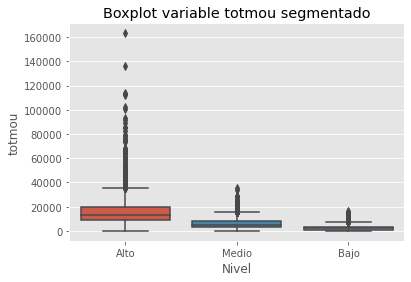

In [339]:
box_plot = sns.boxplot(x="Nivel", y="totmou", data=df_con_etiquetas,)
plt.title('Boxplot variable totmou segmentado')
plt.show()